In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [260]:
all_df = pd.read_csv('C:/Users/User/Desktop/movies_metadata.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_27080\3919758886.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv('C:/Users/User/Desktop/movies_metadata.csv')


In [261]:
df = all_df.sample(n = 1000, random_state = 42)

In [262]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
43526,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",https://www.netflix.com/title/80164212,411405,tt5717492,en,Small Crimes,"A disgraced former cop, fresh off a six-year p...",...,2017-04-28,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Small Crimes,False,5.8,55.0
6383,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,42492,tt0069449,en,Up the Sandbox,"A young wife and mother, bored with day-to-day...",...,1972-12-21,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Up the Sandbox,False,7.3,2.0
3154,False,NaN,1000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,12143,tt0103759,en,Bad Lieutenant,"While investigating a young nun's rape, a corr...",...,1992-09-16,2019469.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Gambler. Thief. Junkie. Killer. Cop.,Bad Lieutenant,False,6.9,162.0
10146,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 10749, '...",NaN,9976,tt0380687,en,Satan's Little Helper,A naïve young boy unknowingly becomes the pawn...,...,2004-01-01,0.0,100.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,You'll laugh 'til you die,Satan's Little Helper,False,5.0,42.0
9531,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,46761,tt0157044,fr,Sitcom,The adventures of an upper-class suburban fami...,...,1998-05-27,0.0,80.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Sitcom,False,6.4,27.0


In [263]:
print("Основная информация о данных:")
print(df.info())

Основная информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 43526 to 36506
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  1000 non-null   object 
 1   belongs_to_collection  98 non-null     object 
 2   budget                 1000 non-null   object 
 3   genres                 1000 non-null   object 
 4   homepage               163 non-null    object 
 5   id                     1000 non-null   object 
 6   imdb_id                999 non-null    object 
 7   original_language      1000 non-null   object 
 8   original_title         1000 non-null   object 
 9   overview               982 non-null    object 
 10  popularity             1000 non-null   object 
 11  poster_path            997 non-null    object 
 12  production_companies   1000 non-null   object 
 13  production_countries   1000 non-null   object 
 14  release_date           100

In [264]:
columns_to_drop = ['budget', 'id', 'imdb_id', 'original_title', 
                   'overview', 'spoken_languages', 'tagline', 'title', 'belongs_to_collection', 'homepage', 'poster_path', 'production_companies', 'production_countries']

df = df.drop(columns = columns_to_drop)

In [265]:
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isna().sum())


Количество пропущенных значений в каждом столбце:
adult                0
genres               0
original_language    0
popularity           0
release_date         0
revenue              0
runtime              5
status               0
video                0
vote_average         0
vote_count           0
dtype: int64


In [266]:
median_minpay = df['runtime'].median()
df['runtime'] = df['runtime'].fillna(median_minpay)

In [267]:
df['adult'] = df['adult'].map({'False': 0, 'True': 1}).astype(int)
df['status'] = df['status'].map({'Released': 0, 'Rumored': 1, 'Post Production': 2}).astype(int)
df['video'] = df['video'].astype(int)
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df = df.drop(columns=['release_date'])

In [268]:
print(df['original_language'].unique())


['en' 'fr' 'nl' 'it' 'ko' 'hi' 'ja' 'cs' 'cn' 'tr' 'sv' 'de' 'ta' 'zh'
 'is' 'hr' 'el' 'pt' 'ml' 'ar' 'ru' 'sr' 'fi' 'th' 'fa' 'ur' 'da' 'es'
 'iu' 'pl' 'hu' 'lv' 'mk' 'et']


In [269]:
from sklearn.preprocessing import LabelEncoder

langs = np.array(['en', 'fr', 'nl', 'it', 'ko', 'hi', 'ja', 'cs', 'cn', 'tr', 'sv', 'de', 'ta', 'zh',
 'is', 'hr', 'el', 'pt', 'ml', 'ar', 'ru', 'sr', 'fi', 'th', 'fa', 'ur', 'da', 'es',
 'iu', 'pl', 'hu', 'lv', 'mk', 'et'])

le = LabelEncoder()
le.fit_transform(langs)

df['original_language_encoded'] = le.transform(df['original_language'])
df = df.drop(columns=['original_language'])

In [270]:
df.head()

,adult,genres,popularity,revenue,runtime,status,video,vote_average,vote_count,release_year,original_language_encoded
43526,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",7.219022,0.0,95.0,0,0,5.8,55.0,2017,6
6383,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0.138450,0.0,97.0,0,0,7.3,2.0,1972,6
3154,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",6.417037,2019469.0,96.0,0,0,6.9,162.0,1992,6
10146,0,"[{'id': 27, 'name': 'Horror'}, {'id': 10749, '...",2.233189,0.0,100.0,0,0,5.0,42.0,2004,6
9531,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1.800582,0.0,80.0,0,0,6.4,27.0,1998,11


In [271]:
print("Основная информация о данных:")
print(df.info())

Основная информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 43526 to 36506
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adult                      1000 non-null   int64  
 1   genres                     1000 non-null   object 
 2   popularity                 1000 non-null   float64
 3   revenue                    1000 non-null   float64
 4   runtime                    1000 non-null   float64
 5   status                     1000 non-null   int64  
 6   video                      1000 non-null   int64  
 7   vote_average               1000 non-null   float64
 8   vote_count                 1000 non-null   float64
 9   release_year               1000 non-null   int32  
 10  original_language_encoded  1000 non-null   int64  
dtypes: float64(5), int32(1), int64(4), object(1)
memory usage: 89.8+ KB
None


In [272]:
import ast
all_genres_set = set() #все жанры

for item in df['genres']:
    if item != '[]':
        try: #строка -> список словарей
            genres = ast.literal_eval(item)
            for g in genres:
                all_genres_set.add(g['name'])
        except:
            continue

for genre in all_genres_set:
    df[genre] = 0  

for idx, item in enumerate(df['genres']):
    if item != '[]':
        try:
            genres = ast.literal_eval(item)
            for g in genres:
                df.at[idx, g['name']] = 1 #1 где есть жанр
        except:
            continue

df = df.drop('genres', axis=1)
df_filled = df.fillna(0)


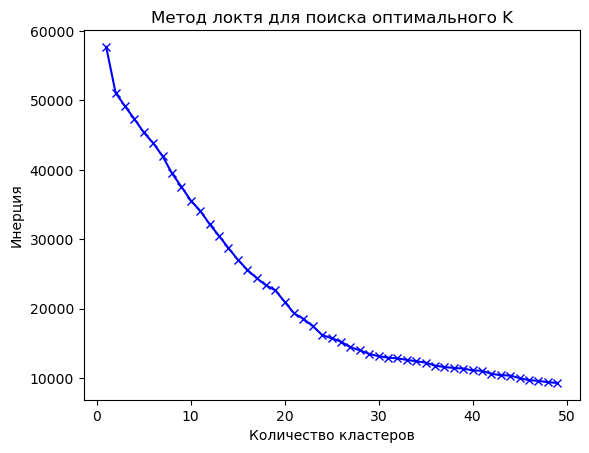

In [273]:
np.random.seed(42)
distortions = []
K = range(1, 50)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42, n_init = 'auto').fit(X_scaled)
    distortions.append(model.inertia_)
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для поиска оптимального K')
plt.show()

In [274]:
from sklearn.metrics.pairwise import cosine_similarity

point = 444
vectors = df_filled.values
similarities = cosine_similarity([vectors[point]], vectors)[0]
top_10 = np.argsort(similarities)[-11:-1][::-1]
top_10_scores = similarities[top_10_idx]

print(f"10 ближайших к точке {point}: {top_10}")
print(f"Их схожести: {similarities[top_10]}")
print(f"Среднее: {top_10_scores.mean():.4f}")

10 ближайших к точке 444: [981 378 864 360 850 994 124 988 522 762]
Их схожести: [0.99996854 0.99989605 0.99952768 0.99951258 0.99947691 0.99935477
 0.99929288 0.99929186 0.99924581 0.99922979]
Среднее: 0.9930
